
# <font color='red'> Some fun with Baby Names </font>



--------------------------------

This notebook follows an introductory example in [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) by Wes McKinney.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#import seaborn as sns

## The Data: US Social Security Administration Baby First Names, since 1880

<img src="SSAgov.JPG" align="left">


[SSA Baby Names](http://www.ssa.gov/oact/babynames/limits.html)


---------------


After having a look from the shell, read one year (1880) into a **Pandas DataFrame**,
with column headings *name*, *sex*, *birth*

In [2]:
cd yobYYYY

C:\Users\jhetrick\Dropbox\Analytics\Bootcamp\USBabyNames\yobYYYY


In [17]:
ls | head

 Volume in drive C is Windows
 Volume Serial Number is E249-8003

 Directory of C:\Users\jhetrick\Dropbox\Analytics\Bootcamp\USBabyNames\yobYYYY

06/16/2020  10:47 PM    <DIR>          .
06/16/2020  10:47 PM    <DIR>          ..
11/19/2019  05:45 PM           478,105 MSDS_aug2019_yournames.jpg
06/16/2020  10:43 PM         7,200,451 names.zip
04/05/2019  05:57 PM           316,364 NationalReadMe.pdf


In [18]:
ls | tail

04/05/2019  05:49 PM           437,159 yob2011.txt
04/05/2019  05:50 PM           435,049 yob2012.txt
04/05/2019  05:50 PM           428,768 yob2013.txt
04/05/2019  05:50 PM           428,107 yob2014.txt
04/05/2019  05:50 PM           426,134 yob2015.txt
04/05/2019  05:50 PM           424,451 yob2016.txt
04/05/2019  05:50 PM           418,588 yob2017.txt
04/05/2019  05:50 PM           411,162 yob2018.txt
             142 File(s)     33,242,849 bytes
               2 Dir(s)  59,357,233,152 bytes free


In [19]:
names1880 = pd.read_csv('yob1880.txt', names=['name','gender','births'])

In [20]:
names1880

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


Now **Groupby** gender, and $\sum$ all births

In [21]:
names1880.groupby('gender')['births'].sum()

gender
F     90994
M    110490
Name: births, dtype: int64

In [22]:
#Collect all data into one DataFrame

pieces = []
cols = ['name','gender','births']
years = range(1880, 2019)

In [23]:
for yr in years:
#    path = 'yob{}.txt'.format(yr)
    path = 'yob' + str(yr) + '.txt'
    frame = pd.read_csv(path,names=cols)
    frame['year'] = yr
    pieces.append(frame)

In [24]:
names = pd.concat(pieces, ignore_index=True)
names

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


In [25]:
names.iloc[900000:900005]

,name,gender,births,year
900000,Alexandra,M,8,1981
900001,Alexsandro,M,8,1981
900002,Alix,M,8,1981
900003,Alok,M,8,1981
900004,Alvarez,M,8,1981


In [26]:
total_births = names.groupby(['gender','year'])['births'].sum()

total_births

gender  year
F       1880      90994
        1881      91953
        1882     107847
        1883     112319
        1884     129019
                 ...   
M       2014    1916564
        2015    1911537
        2016    1891585
        2017    1842837
        2018    1800392
Name: births, Length: 278, dtype: int64

-----------------------------------------------




## Plot Total Births/Year for each gender




------------------------------------------------

<IPython.core.display.Javascript object>


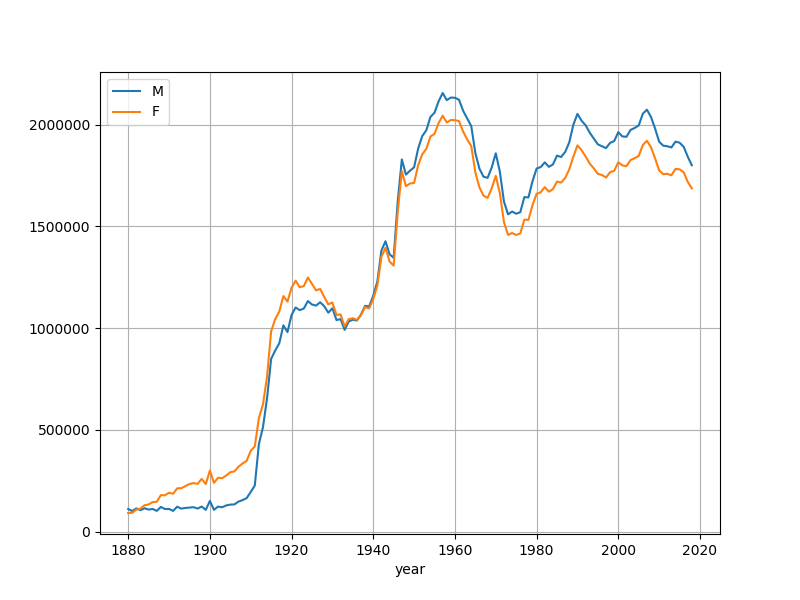

In [29]:
%matplotlib notebook
setPLTdisplay(8,6)
#sns.set()

total_births['M'].plot(x='Year', y='Births', label='M', legend="upper right")
total_births['F'].plot(x='Year', y='Births', label='F', legend="upper right")
plt.grid()

For a discussion of some of the ups and downs seen here, see:

https://www.numbersusa.com/content/learn/overpopulation/biggest-population-boom-ever.html

### Boys and Girls

In [30]:
boys = names[names.gender == 'M']
girls = names[names.gender == 'F']

$~$

$~$

---

### What were the most / least popular *Girl's* names in 2000?


In [31]:
girls[girls.year==2000]

,name,gender,births,year
1332810,Emily,F,25956,2000
1332811,Hannah,F,23082,2000
1332812,Madison,F,19968,2000
1332813,Ashley,F,17997,2000
1332814,Sarah,F,17702,2000
...,...,...,...,...
1350460,Zykeia,F,5,2000
1350461,Zykeriah,F,5,2000
1350462,Zykiera,F,5,2000
1350463,Zyonna,F,5,2000









### How about *Boys* in 2010 ?




In [32]:
boys[boys.year == 2010]

,name,gender,births,year
1677854,Jacob,M,22127,2010
1677855,Ethan,M,18002,2010
1677856,Michael,M,17350,2010
1677857,Jayden,M,17179,2010
1677858,William,M,17051,2010
...,...,...,...,...
1692107,Zymaire,M,5,2010
1692108,Zyonne,M,5,2010
1692109,Zyquarius,M,5,2010
1692110,Zyran,M,5,2010


#### Create a table with the number of each **name** (*cols*) by **year** (*rows*) 

In [33]:
total_births = names.pivot_table('births',index='year',columns='name')

In [34]:
#total_births












------------------------------

## The Rise and Fall of Names

-------------------------------









In [35]:
subset = total_births[['Harold', 'Maude', 'James','Marilyn','Jared','Crystal']]

#subset

<IPython.core.display.Javascript object>


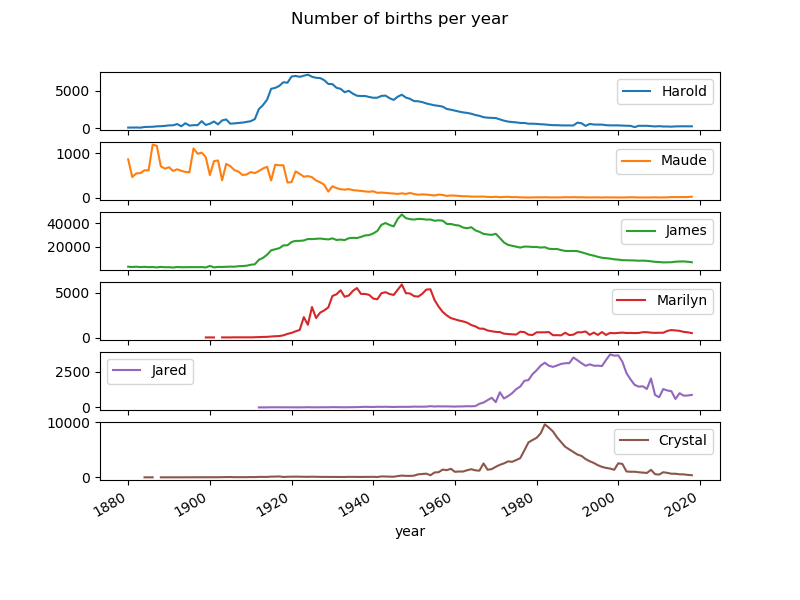

In [36]:
subset.plot(subplots=True, grid=False,title="Number of births per year");

# *Your* first names

$~$

### **Visit:  http://jhetrick.io/firstname**

### **Enter: *YOUR FIRST NAME***

In [74]:
# Read in names
# Create list

yournames = pd.read_csv('../First Name Timeline.csv')
yournames

,Timestamp,What is your first name?
0,2019/11/19 6:07:43 PM PST,Grace
1,2019/11/19 6:07:45 PM PST,MacLean
2,2019/11/19 6:07:49 PM PST,Tormod
3,2019/11/19 6:07:51 PM PST,Caroline
4,2019/11/19 6:07:53 PM PST,Mayu
...,...,...
14,2019/11/19 6:08:21 PM PST,Carina
15,2019/11/19 6:08:22 PM PST,Jordan
16,2019/11/19 6:08:22 PM PST,Justin
17,2019/11/19 6:08:23 PM PST,Ryan


In [75]:
yournames['First'] = yournames['What is your first name?'].str.split().str[0]
yournames

,Timestamp,What is your first name?,First
0,2019/11/19 6:07:43 PM PST,Grace,Grace
1,2019/11/19 6:07:45 PM PST,MacLean,MacLean
2,2019/11/19 6:07:49 PM PST,Tormod,Tormod
3,2019/11/19 6:07:51 PM PST,Caroline,Caroline
4,2019/11/19 6:07:53 PM PST,Mayu,Mayu
...,...,...,...
14,2019/11/19 6:08:21 PM PST,Carina,Carina
15,2019/11/19 6:08:22 PM PST,Jordan,Jordan
16,2019/11/19 6:08:22 PM PST,Justin,Justin
17,2019/11/19 6:08:23 PM PST,Ryan,Ryan


In [76]:
yournames.First

0        Grace
1      MacLean
2       Tormod
3     Caroline
4         Mayu
        ...   
14      Carina
15      Jordan
16      Justin
17        Ryan
18       Artem
Name: First, Length: 19, dtype: object

In [77]:
np.array([(x not in total_births.columns) for x in yournames.First]).sum()

3

In [78]:
no_missing_names = [x for x in yournames.First if x in total_births.columns]
no_missing_names

['Grace',
 'Caroline',
 'Mayu',
 'Josephine',
 'Elan',
 'Yasmeen',
 'Claira',
 'Michaela',
 'Andrew',
 'Yinuo',
 'Jessica',
 'Carina',
 'Jordan',
 'Justin',
 'Ryan',
 'Artem']

<IPython.core.display.Javascript object>


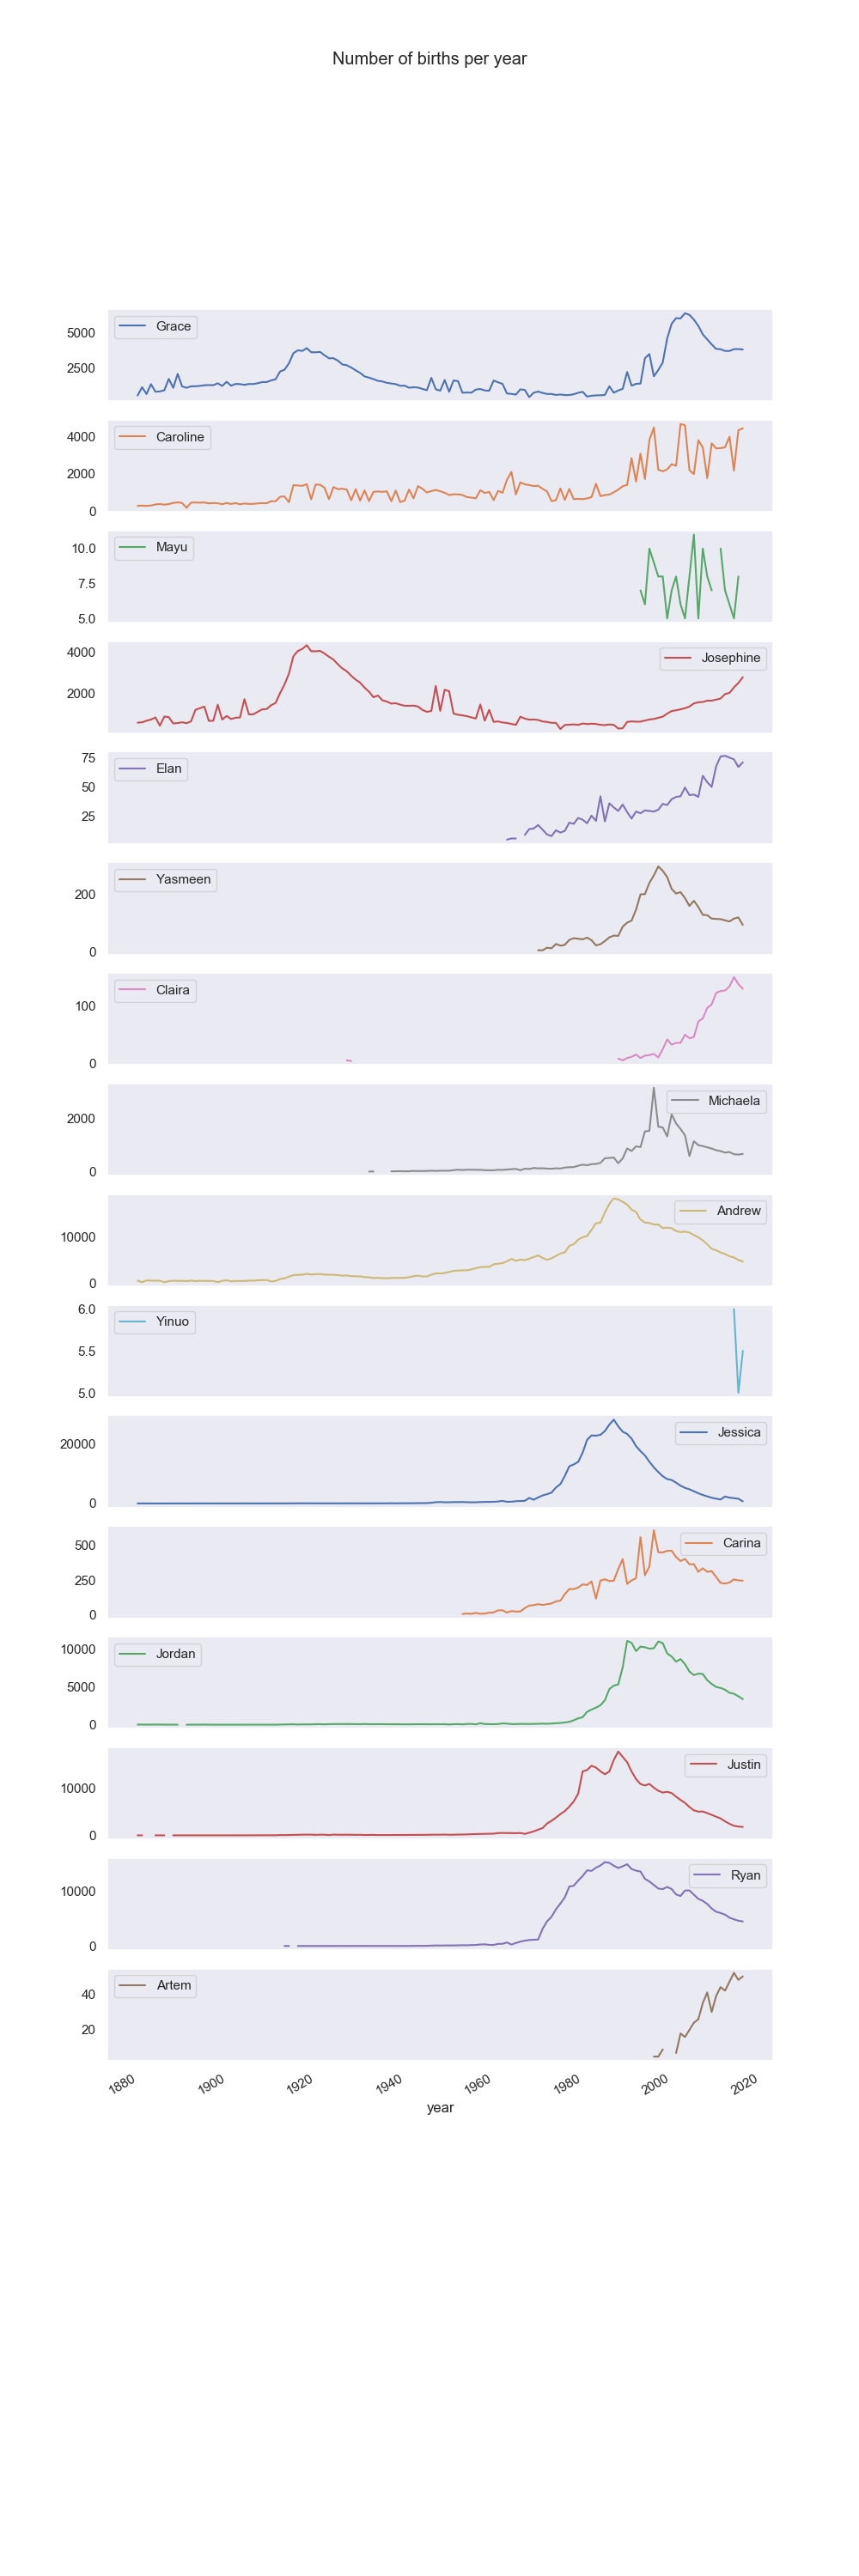

In [79]:
#yoursubset = total_births[list(yournames['Your name'])]
%matplotlib notebook

setPLTdisplay(10,30)
yoursubset = total_births[no_missing_names]

yoursubset.plot(subplots=True, grid=False,title="Number of births per year");

NOTES: 

* No **Arooba** in database
* No **Meredith*e*** (used Meredith)

SORRY!


















------------------------------------


## Gender swapping names


------------------------------------

In [80]:
all_names = names.name.unique()

In [81]:
all_names

array(['Mary', 'Anna', 'Emma', ..., 'Zimo', 'Zyahir', 'Zylyn'], dtype=object)

In [82]:
len(all_names)

96209

In [83]:
mask = np.array(['Lesl' in x for x in all_names])

In [84]:
leslie_like = all_names[mask]

In [85]:
leslie_like

array(['Leslie', 'Lesley', 'Lesly', 'Leslye', 'Leslee', 'Lesli', 'Leslyn',
       'Lesle', 'Lesleigh', 'Leslea', 'Leslieann', 'Lesleyann',
       'Lesleyanne', 'Leslianne', 'Leslieanne', 'Lesliann', 'Leslei',
       'Leslian', 'Lesliee', 'Leslyann', 'Leslly'], dtype=object)

In [86]:
filtered = names[names.name.isin(leslie_like)]

In [87]:
filtered

,name,gender,births,year
654,Leslie,F,8,1880
1108,Leslie,M,79,1880
2522,Leslie,F,11,1881
3072,Leslie,M,92,1881
4593,Leslie,F,9,1882
...,...,...,...,...
1869715,Lesli,F,10,2016
1872908,Leslee,F,7,2016
1874597,Lesleigh,F,6,2016
1880737,Leslie,M,45,2016


In [88]:
filtered.groupby('name').births.sum()

name
Lesle         187
Leslea        349
Leslee       4945
Leslei         52
Lesleigh      474
            ...  
Leslly          5
Lesly       14203
Leslyann       16
Leslye       2389
Leslyn        166
Name: births, Length: 21, dtype: int64

In [89]:
table = filtered.pivot_table('births',index='year',columns='gender', aggfunc=sum)

In [90]:
table = table.div(table.sum(axis=1), axis=0)

<IPython.core.display.Javascript object>


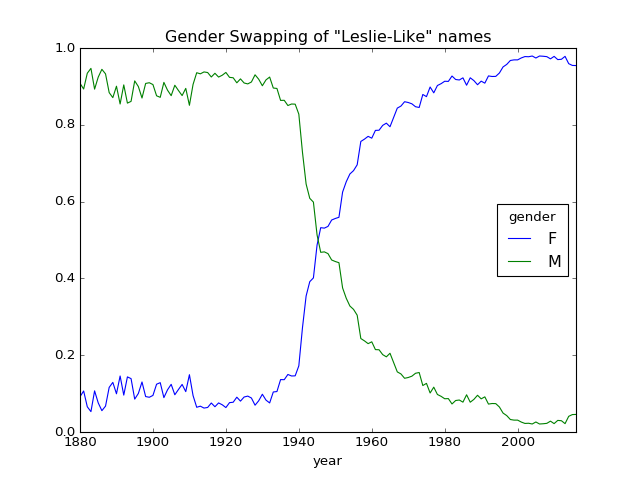

In [30]:
table.plot(title='Gender Swapping of "Leslie-Like" names')

#### How about Courtney?

In [97]:
courtney = np.array(['Courtney'])

In [98]:
filtered = names[names.name.isin(courtney)]

In [99]:
table = filtered.pivot_table('births',index='year',columns='gender', aggfunc=sum)

In [100]:
table = table.div(table.sum(1), axis=0)

<IPython.core.display.Javascript object>


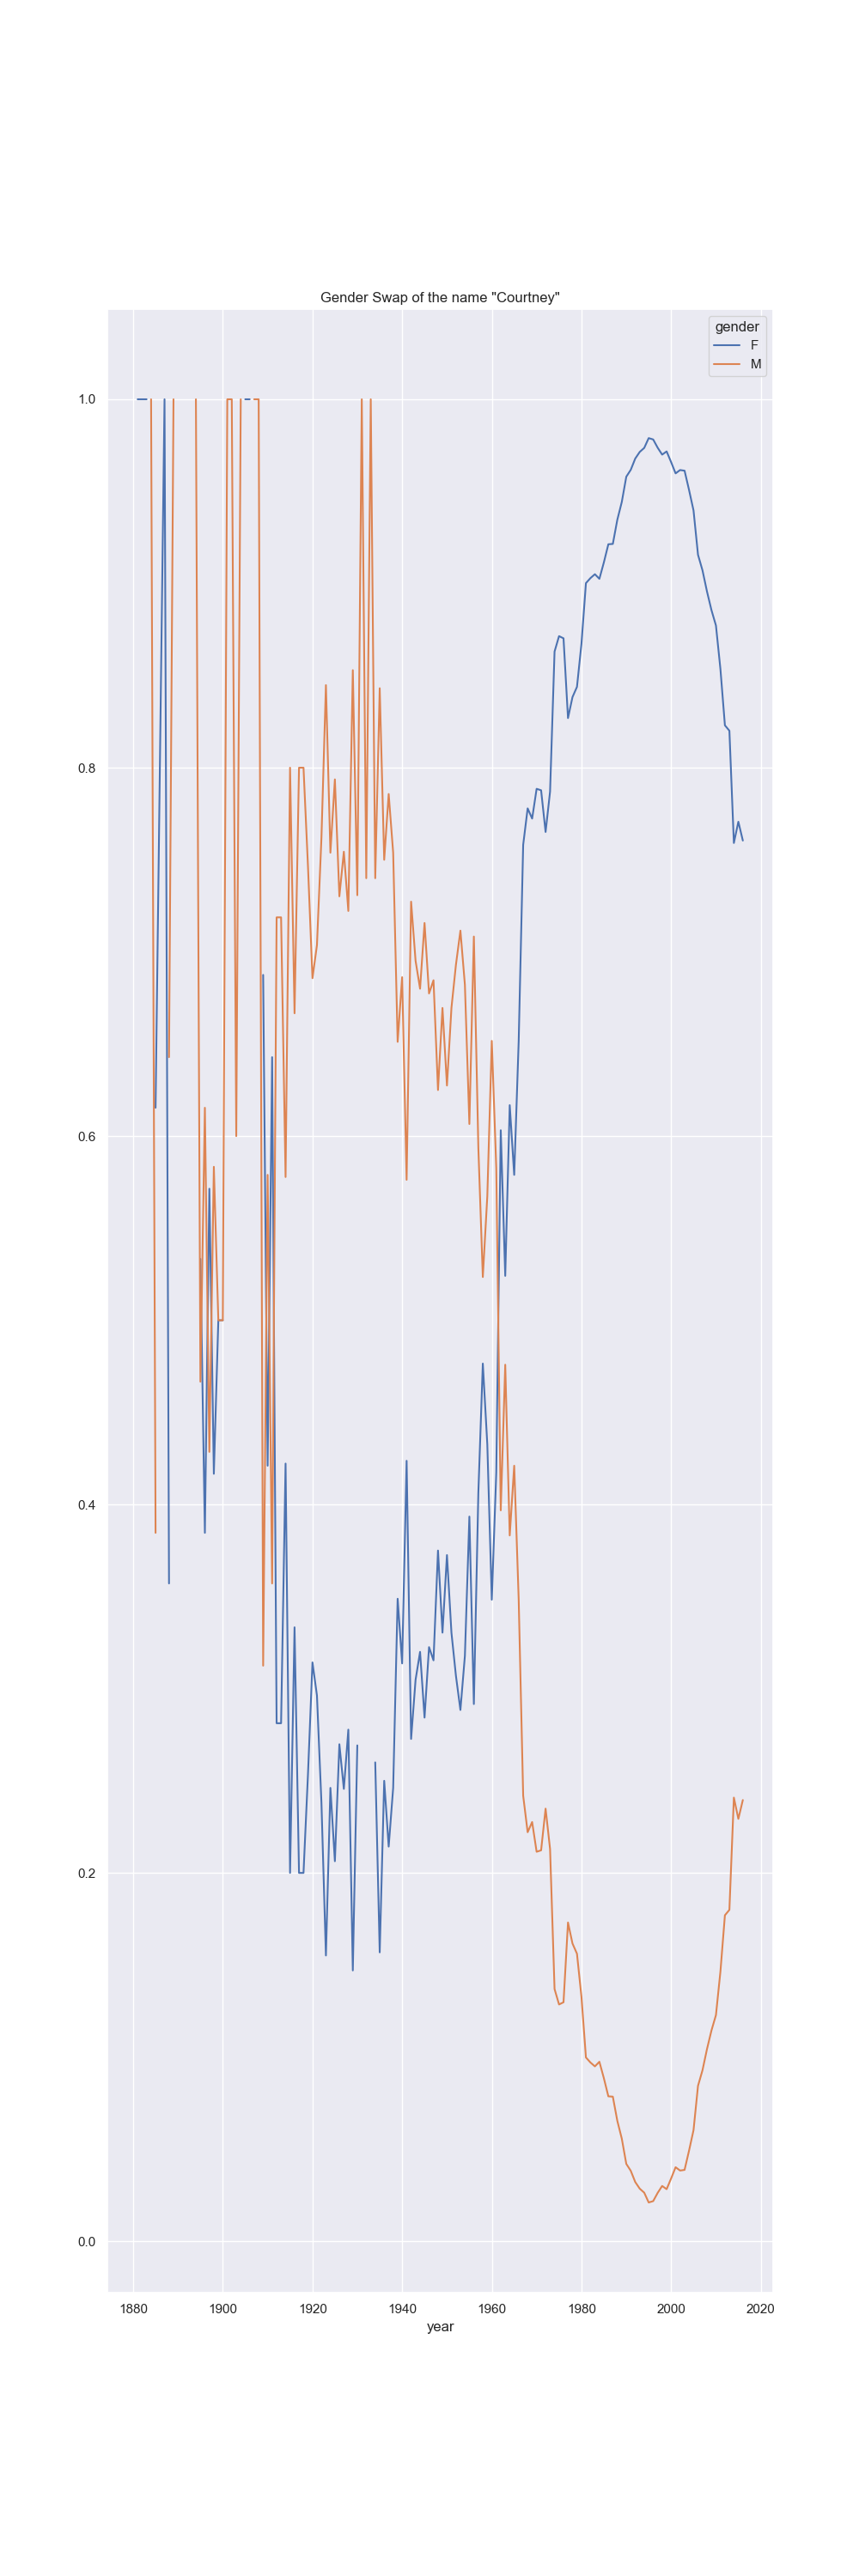

In [101]:
table.plot(yticks=np.linspace(0,1.,6), title='Gender Swap of the name "Courtney"')